In [1]:
from __future__ import (division, print_function)

In [135]:
%autoreload 2
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [416]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import h5py
import cPickle
from scipy.spatial import KDTree
#import seaborn as sns
#sns.set_style('white')

In [5]:
import statsmodels as sm

In [6]:
#from seaborn.distributions \
#    import _statsmodels_bivariate_kde as bivariate_KDE

In [448]:
import sys
sys.path.append("../")
import extract_catalog as ec
import plot_gal_prop as plotg
import plot_DM_prop as plotDM
import get_DM_centroids as getDM
import get_KDE 

In [8]:
partDMfile = "../../data/Illustris-1_" + \
    "00135_APillepich_KarenNG_ParticleData_Group_PartType1.h5"

data_f = h5py.File("../../data/Illustris-1_fof_subhalo" +
                   "_myCompleteHaloCatalog_00135.hdf5")

In [9]:
partDM = h5py.File(partDMfile)

In [10]:
no = 7
size=1e3

In [11]:
part_halos = h5py.File("../../data/DM_particles_clst_loc.h5")
haloEndIx = part_halos["loc"][...]

In [12]:
haloEndIx[5] - haloEndIx[4]

30285624

# the first halo id is 1 ..... different than other index scheme

to correct for consistency, we add the starting index of 0 

In [28]:
haloEndIx = [0] + list(haloEndIx)

In [102]:
partDM.keys()

[u'PartType1_Coordinates', u'PartType1_HaloID', u'PartType1_Masses']

In [105]:
partDM["PartType1_HaloID"][haloEndIx[clstNo]: haloEndIx[clstNo+1]] == 8

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [84]:
crds = \
    partDM["PartType1_Coordinates"][:, haloEndIx[clstNo]: haloEndIx[clstNo+1]]

In [125]:
75 / 106.5

0.704225352112676

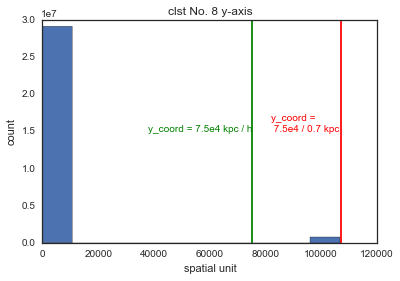

In [132]:
_ = plt.hist(crds[1])
plt.axvline(7.5e4 / 0.7, color='r')
plt.text(8.2e4, 1.5e7, "y_coord = \n 7.5e4 / 0.7 kpc", color='r')
plt.axvline(7.5e4, color='g')
plt.text(3.8e4, 1.5e7, "y_coord = 7.5e4 kpc / h", color='g')
plt.title("clst No. 8 y-axis")
plt.xlabel("spatial unit")
plt.ylabel("count")


In [142]:
clstNo = 7
coord_dict = ec.get_DM_particles([clstNo], partDM, 
                                 dataPath="../../data/")

In [221]:
fhat = getDM.make_histogram_with_2kpc_resolution(coord_dict[7])

In [228]:
get_KDE.find_peaks_from_py_diff(fhat)
get_KDE.get_density_weights(fhat)
peaks_mask = fhat["peaks_dens"] > 0.3

In [256]:
fhat.keys()

['peaks_colIx',
 'peaks_rowIx',
 'peaks_ycoords',
 'peaks_dens',
 'estimate',
 'eval_points',
 'peaks_xcoords']

have a background count threshold on the density

In [260]:
fhat["peaks_xcoords"]

array([ -2.59724805e+03,   1.21630859e+00,  -5.81982422e+03, ...,
        -4.71962793e+03,  -4.71962793e+03,  -8.13023730e+03], dtype=float32)

In [376]:
str(xticks[1][0])

"Text(0,0,u'')"

In [281]:
fhat_I_lum = cPickle.load(open("../../data/fhat_I_lum.pkl", "r"))

In [287]:
fhat7_stars = fhat_I_lum[7]

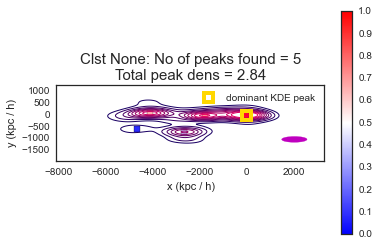

In [288]:
plotg.plot_KDE_peaks(fhat7_stars)

In [400]:
peaks_mask = fhat["peaks_dens"] > 0.10
np.sum(peaks_mask)
DMpeakCoords = np.array([fhat["peaks_xcoords"][peaks_mask], 
                         fhat["peaks_ycoords"][peaks_mask]]).transpose()
# DMpeakCoords *= 75 / 106.5

In [401]:
tree = KDTree(DMpeakCoords)

In [412]:
galpeakCoords = np.array([fhat7_stars["peaks_xcoords"], 
                          fhat7_stars["peaks_ycoords"]]).transpose()
print("units of kpc / h")
print(galpeakCoords)
galpeakCoords *= 106.5 / 75.
print("changed to units of kpc")
print(galpeakCoords)

units of kpc / h
[[ -3.91144037e+01  -5.98372714e-01]
 [ -1.76604373e+03  -2.01415399e+01]
 [ -4.11466760e+03   7.75742959e+01]
 [ -2.66404697e+03  -7.23695557e+02]
 [ -4.66728499e+03  -5.86893387e+02]]
changed to units of kpc
[[ -5.55424532e+01  -8.49689254e-01]
 [ -2.50778209e+03  -2.86009866e+01]
 [ -5.84282800e+03   1.10155500e+02]
 [ -3.78294670e+03  -1.02764769e+03]
 [ -6.62754468e+03  -8.33388610e+02]]


In [403]:
dist, match = tree.query(galpeakCoords, p=2, k=1)

In [404]:
dist

array([  9.13540626,   1.69717129,   2.60895408,  39.97285013,  57.8615806 ])

In [405]:
galpeakCoords

array([[ -5.55424532e+01,  -8.49689254e-01],
       [ -2.50778209e+03,  -2.86009866e+01],
       [ -5.84282800e+03,   1.10155500e+02],
       [ -3.78294670e+03,  -1.02764769e+03],
       [ -6.62754468e+03,  -8.33388610e+02]])

In [406]:
DMpeakCoords[match]

array([[ -4.67919922e+01,  -3.47363281e+00],
       [ -2.50923242e+03,  -2.94824219e+01],
       [ -5.84382861e+03,   1.12564941e+02],
       [ -3.74345312e+03,  -1.03381909e+03],
       [ -6.56995850e+03,  -8.27750000e+02]], dtype=float32)

In [407]:
match

array([543, 496, 423, 582,  23])

In [441]:
fhat["log_est"] = np.log(fhat["estimate"])

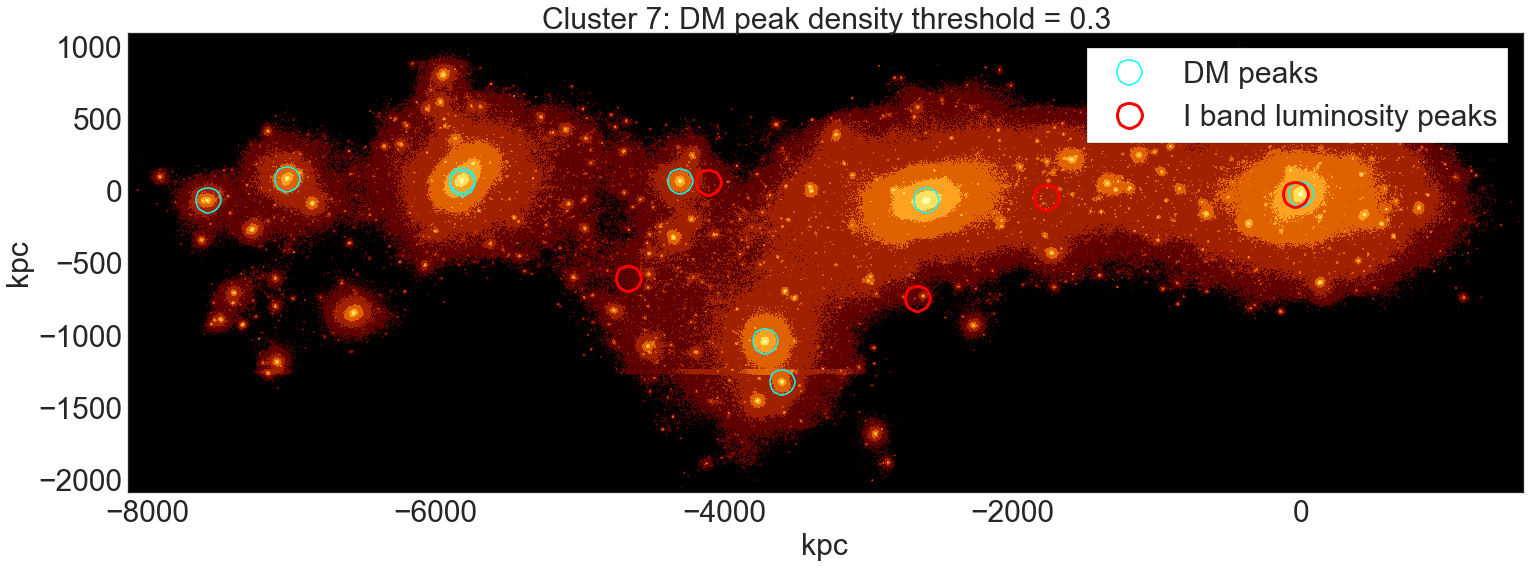

In [450]:
threshold = 0.3
peaks_mask = fhat["peaks_dens"] > threshold

plt.figure(figsize=(25, 25))
plotDM.plot_DM_fhat(fhat, fhat7_stars, 7)

# Zoomed in map near DM density peak 

check how smooth the DM density peaks are ...

In [16]:
def get_dens_and_grid(x, y, bw='normal_reference', 
                      gridsize=100, cut=4, 
                      clip=[-np.inf, np.inf], n_jobs=10):
    from seaborn.distributions \
    import _kde_support 
    import statsmodels.nonparametric.kernel_density as KDE
    KDEMultivariate = KDE.KDEMultivariate
    
    kde = KDEMultivariate(np.array([x, y]),
                          var_type='cc', bw=bw)
    kde.n_jobs = n_jobs
    
    x_support = _kde_support(x, kde.bw[0], gridsize, cut, clip)
    y_support = _kde_support(y, kde.bw[1], gridsize, cut, clip)
    xx, yy = np.meshgrid(x_support, y_support)
      
    z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return xx, yy, z
    